# Практическое задание №2 по теме "Дискретные случайные величины. Закон распределения вероятностей. Биномиальный закон распределения. Распределение Пуассона".

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('seaborn-whitegrid')
%config InlineBackend.figure_formats = ['svg']

def combinations(n, k):
    """Формула Сочетания.
    """
    
    return np.math.factorial(n) // (np.math.factorial(k) * np.math.factorial(n - k))

def poisson_proba(k: int, lambda_: float) -> float:
    """Формула Пуассона.
    """
    
    return (lambda_ ** k) * (np.exp(-lambda_)) / np.math.factorial(k)

__Задачи 1 и 2__

Контрольная работа состоит из пяти вопросов. На каждый вопрос приведено четыре варианта ответа, один из которых правильный. Случайная величина X задаёт число правильных ответов при простом угадывании. Найдите математическое ожидание данной случайной величины. Найдите дисперсию случайной величины X.

_Подсказка:_ постройте закон распределения случайной величины X.

___Решение___

Пусть есть событие $A$ - угадан правильный ответ на вопрос, т.к. в каждом вопросе четыре варианта ответа, то событие $A$ наступает с вероятностью $p=\frac{1}{4}$. Биномиальный закон описывает распределение заданой случайной величины  $X$, задающей число наступлений события  $A$  в ходе проведения  $n$  независимых опытов ($n$ вопросов в контрольной работе, $n=5$).

Воспользуемся __формулой Бернулли:__ $$P(X = k) = C_n^k p^k (1 - p)^{n - k}$$


Посчитаем вероятность каждого значения:
$$P(X = 0) = C_5^0 \cdot 0.25^0 \cdot 0.75^5 = \frac{5!}{0! \: 5!} \cdot 0.25^0 \cdot 0.75^5 = 0.23730$$
$$P(X = 1) = C_5^1 \cdot 0.25^1 \cdot 0.75^4 = \frac{5!}{1! \: 4!} \cdot 0.25^1 \cdot 0.75^4 = 0.39550$$
$$P(X = 2) = C_5^2 \cdot 0.25^2 \cdot 0.75^3 = \frac{5!}{2! \: 3!} \cdot 0.25^2 \cdot 0.75^3 = 0.26367$$
$$P(X = 3) = C_5^3 \cdot 0.25^3 \cdot 0.75^2 = \frac{5!}{3! \: 2!} \cdot 0.25^3 \cdot 0.75^2 = 0.08789$$
$$P(X = 4) = C_5^3 \cdot 0.25^4 \cdot 0.75^1 = \frac{5!}{4! \: 1!} \cdot 0.25^4 \cdot 0.75^1 = 0.01465$$
$$P(X = 5) = C_5^5 \cdot 0.25^5 \cdot 0.75^0 = \frac{5!}{5! \: 0!} \cdot 0.25^5 \cdot 0.75^0 = 0.00098$$

In [2]:
p_0 = combinations(5,0)*np.power(0.25, 0)*np.power(0.75, 5)
p_1 = combinations(5,1)*np.power(0.25, 1)*np.power(0.75, 4)
p_2 = combinations(5,2)*np.power(0.25, 2)*np.power(0.75, 3)
p_3 = combinations(5,3)*np.power(0.25, 3)*np.power(0.75, 2)
p_4 = combinations(5,4)*np.power(0.25, 4)*np.power(0.75, 1)
p_5 = combinations(5,5)*np.power(0.25, 5)*np.power(0.75, 0)

print(p_0, p_1, p_2, p_3, p_4, p_5)
print(f"Проверка суммы: {np.sum((p_0, p_1, p_2, p_3, p_4, p_5))}")

0.2373046875 0.3955078125 0.263671875 0.087890625 0.0146484375 0.0009765625
Проверка суммы: 1.0


Итак, закон распределения случайной величины $X$:

<table border="3">
    <tr>
        <th>$x$</th>
        <td>0</td>
        <td>1</td>
        <td>2</td>
        <td>3</td>
        <td>4</td>
        <td>5</td>
    </tr>
    <tr>
        <th>$P(X = x)$</th>
        <td>0.23730</td>
        <td>0.39550</td>
        <td>0.26367</td>
        <td>0.08789</td>
        <td>0.01465</td>
        <td>0.00098</td>
    </tr>
</table>

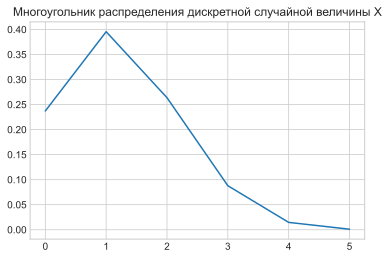

In [3]:
x_values = np.arange(0, 6)
x_probabilities = np.array((p_0, p_1, p_2, p_3, p_4, p_5))

plt.plot(x_values, x_probabilities)
plt.title('Многоугольник распределения дискретной случайной величины Х')
plt.show()

$M(X) = \displaystyle\sum_i p_i x_i = 1.25$

In [4]:
m = (x_values * x_probabilities).sum()
m

1.25

$D(X) = M \left( (X - M(X))^2 \right) = 0.9375$

In [5]:
x_square_values = np.power((x_values - m), 2)

In [6]:
d = (x_square_values * x_probabilities).sum()
d

0.9375

Математическое ожидание и дисперсию для биномиально распределённой дискретной величин также можно вычислить по формулам:

$$M(X) = np, \: D(X) = np(1 - p)$$

In [7]:
n = 5
p = 0.25

M_X = n*p
D_X = n*p*(1-p)

print(f"M(X)={M_X}")
print(f"D(X)={D_X}")

M(X)=1.25
D(X)=0.9375


___Ответ:___ $M(X) = 1.25$, $D(X) = 0.9375$

---

__Задача 3__

Пользователь получает в среднем 10 писем со спамом на свой почтовый ящик за сутки. Найти число N, такое, что с вероятностью 0.95 пользователь получит не более N писем со спамом за текущий день.

___Решение___

Воспользуемся __распределением Пуассона__ и соответствующей __формулой Пуассона:__

$$P(X = k) = \dfrac{\lambda^k e^{-\lambda}}{k!}$$

По условию задачи интенсивность $\lambda = 10$

Для решения задачи нужно выяснить как получается вероятность $p=0.95$. Вероятность получить не более $N$ писем со спамом предполагает получение от 0 до N писем со спамом включительно, то есть нужно сложить несколько вероятностей для каждого конкретного случая:
$$P(X \leq N) = \displaystyle\sum_{i = 0}^{N} \dfrac{\lambda^{i} e^{-\lambda}}{i!} = \dfrac{10^{i} e^{-10}}{i!} = 0.95$$

In [8]:
result = []
# Рассмотрим n от 0 до 30
n_list = np.arange(0, 30)
lambda_ = 10
p = 0.95
acc = 2
for n in n_list:
    prob = sum(poisson_proba(k=i, lambda_=lambda_) for i in range(n))
    prob = np.round(prob, acc)
    if prob == p:
        result.append(n)
print(f"С вероятностью p={p} пользователь получит не более N={result[0]-1} писем со спамом за сутки.")

С вероятностью p=0.95 пользователь получит не более N=15 писем со спамом за сутки.


___Ответ:___ $N=15$

---

__Задача 4__

Производятся выстрелы по мишени. Вероятность попадания в мишень при одном выстреле равна 0.01. Сколько выстрелов нужно сделать чтобы быть уверенным с вероятностью 0.9, что хотя бы 6 раз будет совершено попадание?

_Подсказки:_ 
<ol>
    <li>"Вероятность попасть k раз при n выстрелах" - на какое распределение это похоже?</li>
    <li> А если нам нужна вероятность P(X >= k), а не P(X = k)?</li>
    <li> Здесь предстоит немножко покодить.</li>
</ol>

___Решение___

Воспользуемся __биномиальным законом__ распределения и __формулой Бернулли__:

$$P(X = k) = C_n^k p^k (1 - p)^{n - k}$$

Пусть есть событие  $A$  - выстрел попал в мишень, вероятность попадания в мишень при одном выстреле $p = 0.01$. Дискретная случайная величина $X$ задает число наступлений события  $A$  в ходе проведения  $n$  независимых опытов (выстрелов в мишень).

Нужно найти такое $n$, при котором $P(X \geq 6) = 0.9$

Мы знаем, что сумма вероятностей случайной величины всегда равна  1. Значит, вероятность сделать менее 6 попаданий будет равна:

$$P(X \geq 6) = 1 - P(X < 6)$$

$$P(X < 6) = 1 - P(X \geq 6) $$

$$P(X < 6) = 0.1$$

Теперь решения задачи сводится к нахождению такого $n$, при котором $P(X < 6) = 0.1$

Для решения такой задачи нужно сложить несколько вероятностей. Вероятность попасть в мишень менее 6 раз предполагает от 0 до 5 попаданий включительно:

$$P(X < 6) = \displaystyle\sum_{i = 0}^{5} C_n^i p^i (1 - p)^{n - i}$$

In [9]:
result = []
# точность расчетов: 3 знака после запятой
acc = 3
p = 0.01
q = 0.99
n_list = np.arange(6, 3000)
k_list = np.arange(0, 6) 
for n in n_list:
    p_list = [combinations(n, i)*np.power(p, i)*np.power(q, (n-i)) for i in k_list]
    p_5 = np.sum(p_list)
    p_5 = np.round(p_5, acc)
    if p_5 == 0.1:
        result.append(n)
if result:
    print(f"При количестве выстрелов n={result} количество попаданий будет меньше 6 c вероятностью p=0.1")

При количестве выстрелов n=[925, 926] количество попаданий будет меньше 6 c вероятностью p=0.1


In [10]:
n = 926
probability = np.sum([combinations(n, i)*np.power(p, i)*np.power(q, (n-i)) for i in k_list])
probability_diff_1= np.abs(probability - 0.1)
probability_diff_1

0.00036271215313543603

In [11]:
n = 925
probability = np.sum([combinations(n, i)*np.power(p, i)*np.power(q, (n-i)) for i in k_list])
probability_diff_2= np.abs(probability - 0.1)
probability_diff_2

0.00017581020633597455

In [12]:
probability_diff_2 < probability_diff_1

True

Вероятность $P(X < 6)$ при $n=925$ ближе всего к значению $0.1$

В результате, при количестве выстрелов $n=925$ с вероятностью $P = 0.9$ хотя бы 6 раз будет совершено попадание. 

___Ответ:___ 925 выстрелов, расчет проводился с точностью до 3х знаков после запятой.

---